In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.shape

(200, 5)

In [6]:
print("Number of Rows", data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 200
Number of Columns 5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans()
k_means.fit(x)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [15]:
k_means = KMeans()
k_means.fit_predict(x)

array([3, 4, 0, 4, 3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 3, 4, 3, 4,
       0, 4, 0, 4, 3, 4, 3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 3, 4, 3, 7,
       3, 7, 7, 7, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6, 7, 7, 7, 7,
       7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 1, 6, 1, 2, 1, 2, 1,
       6, 1, 2, 1, 2, 1, 2, 1, 2, 1, 6, 1, 2, 1, 6, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 6, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5], dtype=int32)

In [16]:
#Elbow method to find optimal number of clusters

In [17]:
wcss =[]
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(x)
    #vacant clusters sum of squares
    wcss.append(k_means.inertia_)

In [18]:
wcss

[269981.28,
 185917.14253928524,
 106348.37306211118,
 73679.78903948836,
 44454.47647967974,
 37265.86520484347,
 31898.925198412697,
 27298.924769965754,
 27927.624097563195,
 20080.72737314867]

In [19]:
import matplotlib.pyplot as plt

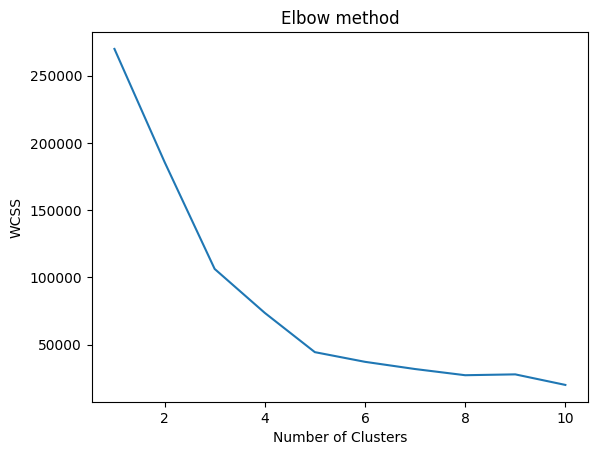

In [20]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
"""optimal number of clusters are 5 as the rate of decrease reduces at 5""" 

'optimal number of clusters are 5 as the rate of decrease reduces at 5'

In [22]:
"Model Training"
#Train the model with optimal number od clusters
x = data[['Annual Income (k$)','Spending Score (1-100)']]

In [23]:
k_means = KMeans(n_clusters = 5, random_state = 42)
y_means = k_means.fit_predict(x)

In [24]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

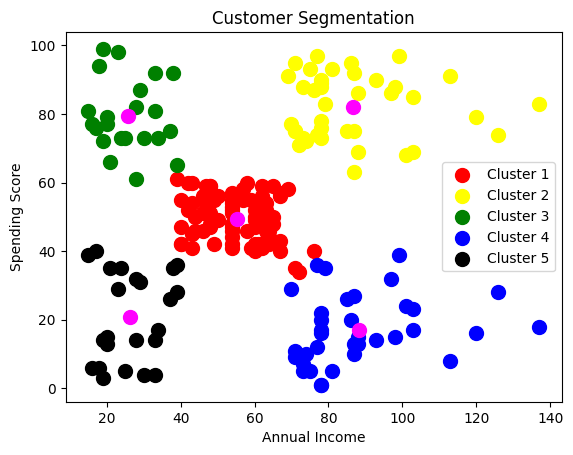

In [25]:
plt.scatter(x.iloc[y_means == 0,0],x.iloc[y_means == 0, 1], s = 100, c= 'red',label = "Cluster 1") 
plt.scatter(x.iloc[y_means == 1,0],x.iloc[y_means == 1, 1], s = 100, c= 'yellow',label = "Cluster 2")
plt.scatter(x.iloc[y_means == 2,0],x.iloc[y_means == 2, 1], s = 100, c= 'green',label = "Cluster 3") 
plt.scatter(x.iloc[y_means == 3,0],x.iloc[y_means == 3, 1], s = 100, c= 'blue',label = "Cluster 4") 
plt.scatter(x.iloc[y_means == 4,0],x.iloc[y_means == 4, 1], s = 100, c= 'black',label = "Cluster 5") 
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s =100, c = 'magenta')
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [26]:
k_means.predict([[15,39]])

C:\Users\Kanishka J\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [27]:
import joblib

In [28]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [29]:
model = joblib.load('customer_segmentation')

In [30]:
model.predict([[15,39]])

C:\Users\Kanishka J\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [31]:
import pickle as pk

In [32]:
pk.dump(k_means,open('Customer_segmentation_model.pkl','wb'))